In [31]:
from keras.models import Sequential  # Mengimpor modul Sequential dari Keras untuk membuat model neural network secara berurutan
from keras.layers import Dense  # Mengimpor modul Dense dari Keras untuk menambahkan layer dense pada model neural network
import pandas as pd  # Mengimpor Pandas sebagai pd untuk membaca file CSV

df = pd.read_csv("Latihan01.csv", decimal = ',')  # Membaca file CSV "Latihan01.csv" dan menyimpannya sebagai DataFrame df dengan menggunakan method pd.read_csv(). Parameter decimal = ',' digunakan untuk menentukan tanda desimal dalam file CSV

,x1,x2,y
0,-0.365057,-0.319084,0.273112
1,1.915594,0.129009,1.657577
2,-1.416086,-0.431537,-0.553012
3,-1.453220,-1.454493,1.455766
4,1.301988,-0.301599,1.905186
...,...,...,...
145,0.454394,1.117911,-1.781428
146,-0.934667,-0.190650,-0.553367
147,1.929511,0.927888,0.073735
148,-0.872532,-1.033666,1.194801


In [32]:
data = df.values  # Mengambil nilai dari DataFrame df dengan menggunakan method values dan menyimpannya ke dalam variabel data
batas = data.shape[0] * 7 // 10  # Menentukan batas untuk membagi data training dan data testing. 70% data digunakan untuk training dan 30% data digunakan untuk testing
x = data[:,:2]  # Memisahkan kolom pertama dan kedua dari variabel data sebagai variabel x
y = data[:,-1]  # Memisahkan kolom terakhir dari variabel data sebagai variabel y

x_train = x[:batas]  # Memisahkan 70% data awal sebagai data training untuk variabel x dan menyimpannya ke dalam variabel x_train
x_test = x[batas:]  # Memisahkan 30% data sisanya sebagai data testing untuk variabel x dan menyimpannya ke dalam variabel x_test
y_train = y[:batas]  # Memisahkan 70% data awal sebagai data training untuk variabel y dan menyimpannya ke dalam variabel y_train
y_test = y[batas:]  # Memisahkan 30% data sisanya sebagai data testing untuk variabel y dan menyimpannya ke dalam variabel y_test

In [42]:
model = Sequential()  # Membuat objek Sequential untuk menampung model neural network secara berurutan
model.add(Dense(8,input_dim=2, activation ='relu'))  # Menambahkan layer pertama dengan 8 neuron dan input dimensi sebesar 2. Layer ini menggunakan fungsi aktivasi ReLU
model.add(Dense(8, activation ='relu'))  # Menambahkan layer kedua dengan 8 neuron dan menggunakan fungsi aktivasi ReLU
model.add(Dense(4, activation ='relu'))  # Menambahkan layer ketiga dengan 4 neuron dan menggunakan fungsi aktivasi ReLU
model.add(Dense(4, activation ='relu'))  # Menambahkan layer keempat dengan 4 neuron dan menggunakan fungsi aktivasi ReLU
model.add(Dense(1, activation ='linear'))  # Menambahkan layer kelima dengan 1 neuron dan menggunakan fungsi aktivasi linear
model.compile(optimizer = 'adam',loss = 'mse')  # Mengkompilasi model dengan menggunakan optimizer 'adam' dan loss function 'mse'

In [43]:
model.fit(x,y, batch_size = 1,epochs = 100,validation_split = 0.15)

Epoch 1/100
127/127 [==============================] - 1s 3ms/step - loss: 5.7044 - val_loss: 2.9277
Epoch 2/100
127/127 [==============================] - 0s 3ms/step - loss: 4.7627 - val_loss: 2.4402
Epoch 3/100
127/127 [==============================] - 0s 2ms/step - loss: 3.6541 - val_loss: 1.8418
Epoch 4/100
127/127 [==============================] - 0s 2ms/step - loss: 2.9364 - val_loss: 1.3346
Epoch 5/100
127/127 [==============================] - 0s 2ms/step - loss: 2.5596 - val_loss: 1.0734
Epoch 6/100
127/127 [==============================] - 0s 2ms/step - loss: 2.3343 - val_loss: 0.9282
Epoch 7/100
127/127 [==============================] - 0s 2ms/step - loss: 2.1954 - val_loss: 0.8548
Epoch 8/100
127/127 [==============================] - 0s 2ms/step - loss: 2.0884 - val_loss: 0.7935
Epoch 9/100
127/127 [==============================] - 0s 2ms/step - loss: 1.9921 - val_loss: 0.7370
Epoch 10/100
127/127 [==============================] - 0s 2ms/step - loss: 1.9000 - val_lo

In [44]:
model.predict([[2,1],
               [1,2]])

1/1 [==============================] - 0s 80ms/step


array([[ 0.06733108],
       [-3.0079837 ]], dtype=float32)

In [45]:
model.save_weights("ayam.h5")

In [46]:
model.load_weights('ayam.h5')

In [47]:
model.predict([[1,1],
               [0,1]])

1/1 [==============================] - 0s 35ms/step


array([[-1.006033 ],
       [-2.0060077]], dtype=float32)

In [51]:
#Augmentasi gambar
import Augmentor
def berkembang_biak(sumber,sebanyak):
  p = Augmentor.Pipeline(sumber, '.') 
  p.random_distortion(1,4,4,1)
  p.rotate(0.9,13,13)
  p.zoom_random(0.9,0.7)
  p.resize(1,100,100)
  p.sample(sebanyak)

berkembang_biak("air",300)
berkembang_biak("tanah",300)
berkembang_biak("lumpur",300)

Initialised with 1 image(s) found.
Output directory set to air/..

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x7F3D6838ECD0>: 100%|██████████| 300/300 [00:12<00:00, 24.06 Samples/s]


Initialised with 1 image(s) found.
Output directory set to tanah/..

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x7F3D683D1050>: 100%|██████████| 300/300 [00:12<00:00, 23.65 Samples/s]


Initialised with 1 image(s) found.
Output directory set to lumpur/..

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x7F3D6843C250>: 100%|██████████| 300/300 [00:14<00:00, 20.46 Samples/s]


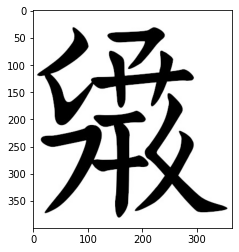

In [56]:
import cv2
import matplotlib.pyplot as plt

gambar = cv2.imread("/content/air/T_Air.jpg")
plt.imshow(gambar)

In [103]:
import glob

x = []
y = []

for nama_file in glob.glob('air/*.jpg'):
  gambar = cv2.imread(nama_file)
  gambar = cv2.resize(gambar,(100,100))/255
  x.append(gambar)
  y.append(0)

for nama_file in glob.glob('tanah/*.jpg'):
  gambar = cv2.imread(nama_file)
  gambar = cv2.resize(gambar,(100,100))/255
  x.append(gambar)
  y.append(1)

for nama_file in glob.glob('lumpur/*.jpg'):
  gambar = cv2.imread(nama_file)
  gambar = cv2.resize(gambar,(100,100))/255
  x.append(gambar)
  y.append(2)

In [104]:
import random
import numpy as np

z =list(zip(x,y))
random.shuffle(z)
x,y = zip(*z)
x = np.array(x)
y = np.array(y)

In [105]:
from keras.layers import Flatten,Conv2D, MaxPooling2D,Dense
model = Sequential()
model.add(Conv2D(8,(3,3),input_shape=(100,100,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.summary()





Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 49, 49, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 16)        1168      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 32)     

In [106]:
model.fit(x,y, batch_size = 2,epochs = 8,validation_split = 0.1)

Epoch 1/8
406/406 [==============================] - 10s 22ms/step - loss: 0.4602 - accuracy: 0.7968 - val_loss: 0.1816 - val_accuracy: 0.9231
Epoch 2/8
406/406 [==============================] - 9s 22ms/step - loss: 0.0842 - accuracy: 0.9754 - val_loss: 0.0438 - val_accuracy: 0.9780
Epoch 3/8
406/406 [==============================] - 9s 22ms/step - loss: 0.0338 - accuracy: 0.9914 - val_loss: 0.0946 - val_accuracy: 0.9670
Epoch 4/8
406/406 [==============================] - 9s 22ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.1585 - val_accuracy: 0.9231
Epoch 5/8
406/406 [==============================] - 9s 22ms/step - loss: 0.0668 - accuracy: 0.9778 - val_loss: 0.0882 - val_accuracy: 0.9780
Epoch 6/8
406/406 [==============================] - 9s 22ms/step - loss: 0.0592 - accuracy: 0.9803 - val_loss: 0.0887 - val_accuracy: 0.9780
Epoch 7/8
406/406 [==============================] - 10s 25ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9780
Epoc

In [110]:
x_test = []
gambar = cv2.imread("/content/lumpur/lumpur_original_T_Lumpur.jpg_0025228a-8196-4e39-a38f-c92c2a845863.jpg")
gambar = cv2.resize(gambar,(100,100))/255
x_test.append(gambar)

y_pred = model.predict(np.asarray(x_test))
y_pred = np.argmax(y_pred,axis = 1)
y_pred

1/1 [==============================] - 0s 25ms/step


array([2])